# EART 70013  <a class="tocSkip">
    
# Geophysical Inversion <a class="tocSkip">    
    
## Lecture 4 - Homework <a class="tocSkip">  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Row-operations-on-an-over-determined-problem" data-toc-modified-id="Homework---Row-operations-on-an-over-determined-problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Row operations on an over-determined problem</a></span></li><li><span><a href="#Homework---An-over-determined-system-with-(by-construction)-an-exact-solution" data-toc-modified-id="Homework---An-over-determined-system-with-(by-construction)-an-exact-solution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - An over-determined system with (by construction) an exact solution</a></span></li><li><span><a href="#Homework---Least-squares-solution-as-a-compromise-between-all-constraints" data-toc-modified-id="Homework---Least-squares-solution-as-a-compromise-between-all-constraints-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Least squares solution as a compromise between all constraints</a></span></li><li><span><a href="#Homework---An-even-simpler-over-determined-case" data-toc-modified-id="Homework---An-even-simpler-over-determined-case-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - An even simpler over-determined case</a></span></li><li><span><a href="#Homework---Outer-product" data-toc-modified-id="Homework---Outer-product-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Outer-product</a></span></li><li><span><a href="#Homework---Matrix-rank-and-RREF-(a-non-square-case)" data-toc-modified-id="Homework---Matrix-rank-and-RREF-(a-non-square-case)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Matrix rank and RREF (a non-square case)</a></span></li><li><span><a href="#Homework---Minimal-norm-solution-to-under-determined-problem" data-toc-modified-id="Homework---Minimal-norm-solution-to-under-determined-problem-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Minimal-norm solution to under-determined problem</a></span></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si

# Homework

## Homework - Row operations on an over-determined problem

Consider the following example from the lecture

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 \\[5pt]
  -3x - 10y & = -11
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  \\
    -3 & -10 
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 \\
    -11
  \end{pmatrix}   
$$

Use row operations on the augmented system in an attempt to solve this problem.

<br>

In doing this you will be able to also establish the rank of $A$ and the rank of the augmented matrix.

What relationship do you need between these two values in order for the problem to have a solution?

Can you think of an example where this wouldn't be the case and you have a system without an exact solution?

The augmented system is $$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        1 & -4 & 3\\
        -3 & -10 & -11\\
    \end{array}
\right),$$

and we can perform row ops as follows to transform $[A|\mathbf{b}]$ into row echelon form from which we can extract the rank. 

$(3) \leftarrow (3) - (2),$ $$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        1 & -4 & 3\\
        -4 & -6 & -14\\
    \end{array}
\right),$$ $(3) \leftarrow (3) - 2\times(1)$ $$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        1 & -4 & 3\\
        0 & 0 & 0\\
    \end{array}
\right),$$ $(2) \leftarrow (2)-0.5\times(1)$ $$\left( 
    \begin{array}{cc|c}
        2 & 3 & 7\\
        0 & 5/2 & -1/2\\
        0 & 0 & 0\\
    \end{array}
\right),$$ $(1) \leftarrow 1/2(1)$ $$\left( 
    \begin{array}{cc|c}
        1 & 3/2 & 7/2\\
        0 & 1 & -1/2\\
        0 & 0 & 0\\
    \end{array}
\right),$$

then we can see that $x_{:3} = \alpha x_{:2} + \beta x_{:1},$ where $\alpha = \frac{17}{4}$ and $\beta = -\frac{1}{2}.$ Thus, the rank of $A$ is 2 and by the Rank-Nullity Theorem the dimension of the rank of the null space must be 1. In order for there to be a solution, we must have that $Rank(A) = Rank([A| \mathbf{b}])$. This would not be the case if, for instance, we had $$\left( 
    \begin{array}{cc|c}
        1 & 3/2 & 7/2\\
        0 & 1 & -1/2\\
        0 & 0 & c\\
    \end{array}
\right),$$ where $c \ne 0$. The rank of the augmented system in this case is three and as such equation (3) reads $0=c$, which leads to a case of non-existence, since there exists no $c \in \mathbb{R}, c\ne 0$ s.t. the equation is satisfied. 

## Homework - An over-determined system with (by construction) an exact solution

Recall the simple over-determined problem from the lecture

`A = np.array([[2, 3], [1, -4], [1, 10]])`

You were asked to think about how you could change the RHS vector only in order to come up with a version of the over-determined problem that has an exact solution. You were given the hint to think about the range of the LHS matrix $A$

The overdetermined system in this case is $$\begin{bmatrix}2&3 \\ 1&-4 \\ 1&10 \end{bmatrix}\begin{pmatrix}x \\ y \end{pmatrix} = \begin{pmatrix}a \\ b \\c \end{pmatrix},$$ $$\Leftrightarrow A\mathbf{x} = \mathbf{b},$$ where $a, b,$ and $c$ are real constants to be found s.t. the system has a solution. We must choose the LHS $\mathbf{b}$ such that it is in the column space of a two-dimensional subspace of $A$ if there is to be a solution. 

The equations are $$2x+3y = a,$$ $$ x-4y = b ,$$ $$x+10y=c.$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

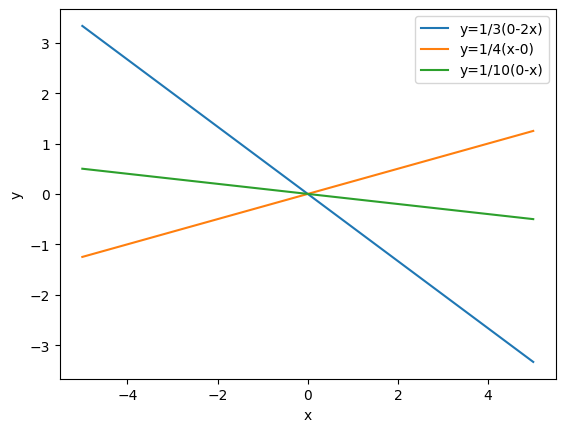

In [4]:
%matplotlib inline
# Plotting to aid with visualisation 

def f1(x, a):
    return 1/3*(a-2*x)

def f2(x, b):
    return 1/4*(x-b)

def f3(x, c):
    return 1/10*(c-x)

x = np.linspace(-5, 5, 100)

# Choosing our values of the constants a, b, c
a, b, c = (0, 0, 0)

y1 = [f1(xi, a) for xi in x]
y2 = [f2(xi, b) for xi in x]
y3 = [f3(xi, c) for xi in x]

# Setting up our plot

fig, ax = plt.subplots()

ax.plot(x, y1, label=f'y=1/3({a}-2x)')
ax.plot(x, y2, label=f'y=1/4(x-{b})')
ax.plot(x, y3, label=f'y=1/10({c}-x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Above, we can see that the equation is satisfied for the LHS vector $\begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$, but this is a trivial case that we do not care for. To have an exact solution, $\mathbf{b}^T$ must be in the column space, or range, of $A$. The column space of $A$ is spanned by its two columns, i.e., $$a_{:1} = \begin{pmatrix}2 \\ 1 \\ 1 \end{pmatrix},$$ $$a_{:2} = \begin{pmatrix}3 \\ -4 \\ 10 \end{pmatrix}.$$ Thus, if $\mathbf{b}^T$ is to be in the column space of $A$ we must be able to write $$\mathbf{b} = \lambda_1 a_{:1} + \lambda_2 a_{:2},$$ where $\lambda \in \mathbb{R}^{2\times 3}$. We can expand this to be $$\begin{pmatrix}a \\ b \\ c \end{pmatrix} = \lambda_1 \begin{pmatrix} 2 \\ 1 \\ 1\end{pmatrix} + \lambda_2 \begin{pmatrix} 3 \\ -4 \\ 10\end{pmatrix},$$ $$\Big\Updownarrow$$ $$a =2\lambda_1 +3\lambda_2,$$ $$b = \lambda_1 - 4\lambda_2,$$ $$c = \lambda_1 +10\lambda_2.$$ Then with $$\lambda_1 = b - 4\lambda_2$$ and $$\lambda_2 = \frac{1}{10}(c - \lambda_1),$$ we can write the third equation to be $$c = b+14\lambda_2,$$ and eventually through susbtitution and expansion we find that $$a = \frac{17b+11c}{14}.$$ Thus, any $a, \ b,\ c$ which satisfy the above equation are such that $\mathbf{b}^T$ is in the column space of $A$ and a solution exists. 

We see of course that by choosing any one of the three to be equal to zero we may solve for a vector $\mathbf{b}$ which is a solution to the system. For instance, with $a =1,\ c = 0$, the solution vector is $$\begin{pmatrix} 1 \\ 14/17 \\ 0 \end{pmatrix},$$ which we can see is a solution below.

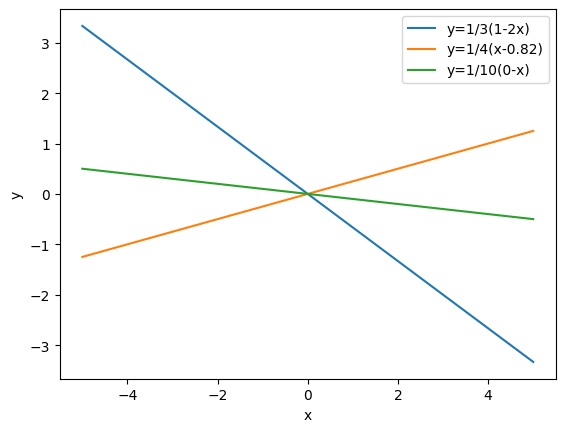

In [5]:
%matplotlib inline

fig, ax = plt.subplots()

a, b, c = (1, 14/17, 0)

ax.plot(x, y1, label=f'y=1/3({a}-2x)')
ax.plot(x, y2, label=f'y=1/4(x-{b:.2f})')
ax.plot(x, y3, label=f'y=1/10({c}-x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

## Homework - Least squares solution as a compromise between all constraints

At the end of the lecture we showed an example and noted that the least squares solution was attempting to satisfy all three constraint equations, and that the specific value found was the one which minimised $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$.

By perturbing the values of the obtained least squares solution, show that it is indeed the case that these lead to $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$ growing.

We saw in the lecture that, assuming the matrix $A^{-1}$ exists, the least squares solution to a problem in the form of $A\mathbf{x}=\mathbf{b}$ is found by solving $$A^T A\mathbf{x}=A^T \mathbf{b}.$$ This solution is valid and useful in solving overdetermined problems, i.e., where $A$ is tall, or $m>n$.

Let's first compute the least squares solution for the system above.

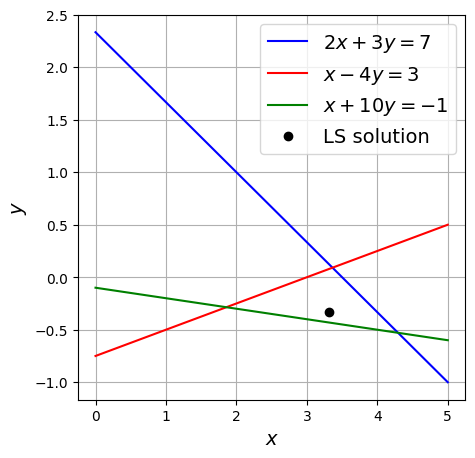

In [6]:
# As copied from the lecture

A = np.array([[2, 3], [1, -4], [1, 10]])

# Form the matrix A.T @ A
ATA = A.T @ A  

# Form the RHS vector:
rhs = A.T @ np.array([7,3,-1])

# solve the system
ls_sol = sl.solve(ATA, rhs)

# plot this solution to see where it lies

x = np.linspace(0,5,100)

y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)
y3 = -(1./10.)*x - (1./10.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')
ax1.plot(x,y3,'g', label='$x+10y=-1$')
ax1.plot(ls_sol[0], ls_sol[1], 'ko', label='LS solution')

ax1.legend(loc='best', fontsize=14)

And now let's form and analyse the behaviour of the residuals under random perturbations.

In [14]:
import scipy.linalg as sl

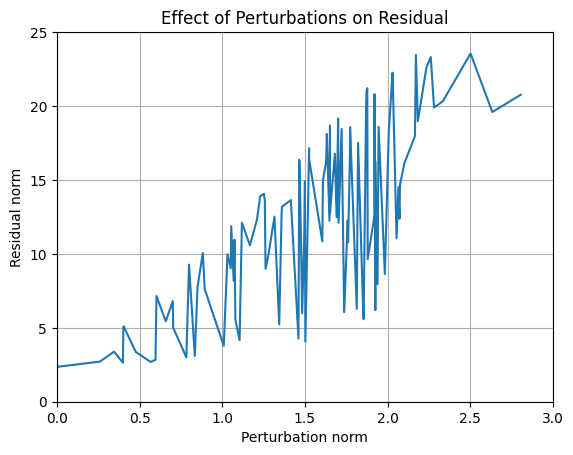

In [ ]:
%matplotlib inline
pert = np.random.uniform(-2, 2, size=(100,2))
pert = np.vstack([pert, np.array([0, 0])]) # ensure [0, 0] is checked

b = np.array([7,3,-1])

# compute the 2 norm
residuals = np.array([sl.norm(A@(ls_sol + p) - b) for p in pert])

fig = plt.figure()
ax1 = fig.add_subplot(111)
pert = np.linalg.norm(pert, axis=1) # compute perturbation magnitude

# Sort perturbations and residuals by perturbation magnitude
sorted_indices = np.argsort(pert)  # Get sorting order
sorted_pert_magnitudes = pert[sorted_indices]  # Order perturbation magnitudes
sorted_residuals = residuals[sorted_indices]  # Order residuals accordingly

ax1.plot(sorted_pert_magnitudes, sorted_residuals)
ax1.set_xlabel("Perturbation norm")
ax1.set_ylabel("Residual norm")
ax1.set_title("Effect of Perturbations on Residual")
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 25)
ax1.grid(True)
plt.show()


As seen above, our solution does indeed minimise the residuals, because a perturbation with a norm of 0 results in the lowest residual.

## Homework - An even simpler over-determined case

In the lecture, and above, we considered the simple case of three equations, two unknowns.

Of course there is an even simpler case - two-equations, one unknown.

An example might be

$$
\begin{align*}
  2x &= 8 \\[5pt]
   3x &= 9
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 \\[5pt]
    3
  \end{pmatrix}
  \begin{pmatrix}
    x 
  \end{pmatrix}=
  \begin{pmatrix}
    8 \\
    9 
  \end{pmatrix}   
$$

Does this have a solution?

No clearly not. What solution does the least square approach return?

There is no solution vector $\mathbf{x}, \ \mathbf{x} \in \mathbb{R}$ which satisifes the system of equations. 

In [47]:
# Define our system
A = np.array([2, 3])
b = np.array([8, 9])

# Compute the least squares solution

lhs = A.T @ A
rhs = A.T @ b

ls_sol = sl.solve(lhs, rhs)
print(f'Our LS solution: {ls_sol[0]:.3f}')

Our LS solution: 3.308


## Homework - Outer-product

Comnpute the outer-product ($\boldsymbol{a}\boldsymbol{b}^T$) of the column vectors

$$\boldsymbol{a} = 
\begin{pmatrix}
1 \\
2\\
3 
\end{pmatrix}, 
\qquad
\boldsymbol{b} = 
\begin{pmatrix}
4 \\
5\\
6 
\end{pmatrix}.
$$

What is the resulting matrices rank?

The outer product $ab^T$ is $$\begin{pmatrix}4 & 5 & 6 \\ 8 & 10 & 12 \\ 12 & 15 & 18 \end{pmatrix}.$$ $Rank(\mathbf{ab}^T) = 1,$ clearly, since each row is merely a scalar multiple of one of the other 2. For the sake of taking note, if the rank of the matrix were to be two then the rows or columns must be such that one of them is equal to a combination of scalar multiples of the other 2.

## Homework - Matrix rank and RREF (a non-square case)

Consider the rectangular matrix

$$
\begin{pmatrix}
3 & 1 & 9 & 4 \\
2 & 1 & 7 & 3 \\
5 & 2 & 16 & 7 
\end{pmatrix}
$$

convert to REF and RREF. 

From these what is the rank of this matrix?

What is the null space?

## Homework - Minimal-norm solution to under-determined problem

Let's begin this example from a problem already in RREF, the augmented form of the matrix with zero RHS being

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 4 & 0 & 0 \\
0 & 1 & -2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 
  \end{array}
\right)$$

Show that the null space is given by any multiple of the following vector.

$$\boldsymbol{v}
=
\begin{pmatrix}
-4\\
2\\
1\\
0
\end{pmatrix}
$$

Now consider the solution to the problem with RHS vector

$$\boldsymbol{b} = \begin{pmatrix}
1 \\
-2\\
3
\end{pmatrix} $$

Use the minimum norm solution formula from the lecture to compute the solution.

Establish that it is indeed the minimal-norm solution, i.e. that all other possible solutions you obtain by adding multiples of the null vector have a larger norm.